## Import zależności

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
import io

## Wczytanie ramki danych

In [3]:
books = pd.read_csv('../data/books.csv', keep_default_na=False)

## Analiza danych

### Kolory okładek

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

rows = books.loc[books['dominant_color_name'] == 'yellow', 'img']
rows.head(30)

#### Przykładowe okładki wykryte jako żółte

W większości przypadków program radzi sobie dobrze, prawidłowo wykrywając domunujący kolor okładki.

![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1328874804l/1001341.jpg)
![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1437014640l/1001322._SY475_.jpg)
![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1328876739l/1001309.jpg)

#### Przykładowe kontrowersyjne przypadki wykryte jako niebieskie

Dość często zdarzają się przypadki kontrowersyjne. Poniższe okładki zostały określone przez program jako niebieskie. Niemniej jednak, biorąc pod uwagę dużą liczbę książek, błędne przypadki powinny się rozpłynąć w statystykach.

![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1347292428l/1007157.jpg)
![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1420791445l/1001746.jpg)
![title](https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1329501525l/10176416.jpg)

### Kolaże

Zestawiając ze sobą kolaże stworzone z dużej liczby okładek widać, że z grubsza kolory zostały wykryte prawidłowo.

In [ ]:
def create_collage():
    # List of image URLs
    rows = books.loc[books['dominant_color_name'] == 'red', 'img']
    image_urls = rows.head(200).tolist()

    images = []

    # Download images
    for url in image_urls:
        response = requests.get(url)
        img = Image.open(io.BytesIO(response.content))
        images.append(img)

    # Dimensions of the collage
    collage_width = 20
    collage_height = 10

    # Size of a single image
    img_width, img_height = images[1].size

    # Create a blank canvas for the collage
    collage = Image.new('RGB', (img_width * collage_width, img_height * collage_height))

    # Paste the images into the collage
    for i in range(collage_height):
        for j in range(collage_width):
            collage.paste(images[i * collage_width + j], (j * img_width, i * img_height))
    
    return collage

# Display the collage
collage = create_collage()
collage.show()

### Liczba książek

In [4]:
book_counts = books['dominant_color_name'].value_counts()

book_counts

gray      23877
yellow    21139
white     20595
black     10709
purple     5414
pink       4734
red        3286
green      2149
orange     2104
brown      1563
blue       1142
            243
Name: dominant_color_name, dtype: int64

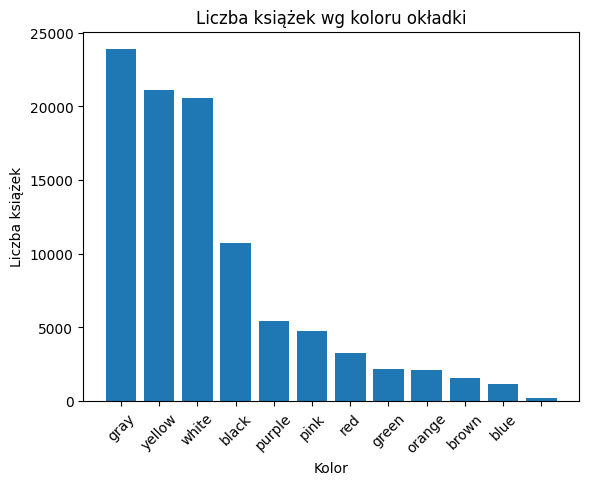

In [5]:
plt.bar(book_counts.index, book_counts.values)
plt.xlabel('Kolor')
plt.ylabel('Liczba książek')
plt.title('Liczba książek wg koloru okładki')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import requests
from PIL import Image
import io

# List of image URLs
rows = books.loc[books['dominant_color_name'] == 'blue', 'img']
image_urls = rows.head(200).tolist()

images = []

# Download images
for url in image_urls:
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    images.append(img)

# Dimensions of the collage
collage_width = 20
collage_height = 10

# Size of a single image
img_width, img_height = images[1].size

# Create a blank canvas for the collage
collage = Image.new('RGB', (img_width * collage_width, img_height * collage_height))

# Paste the images into the collage
for i in range(collage_height):
    for j in range(collage_width):
        collage.paste(images[i * collage_width + j], (j * img_width, i * img_height))

# Display the collage
collage.show()

In [ ]:
import requests
from PIL import Image
import io

# List of image URLs
rows = books.loc[books['dominant_color_name'] == 'brown', 'img']
image_urls = rows.head(200).tolist()

images = []

# Download images
for url in image_urls:
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    images.append(img)

# Dimensions of the collage
collage_width = 20
collage_height = 10

# Size of a single image
img_width, img_height = images[1].size

# Create a blank canvas for the collage
collage = Image.new('RGB', (img_width * collage_width, img_height * collage_height))

# Paste the images into the collage
for i in range(collage_height):
    for j in range(collage_width):
        collage.paste(images[i * collage_width + j], (j * img_width, i * img_height))

# Display the collage
collage.show()

### Średnie oceny

In [7]:
srednie_oceny = books.groupby('dominant_color_name')['rating'].mean()

srednie_oceny = srednie_oceny.sort_values(ascending=False)
srednie_oceny

dominant_color_name
yellow    3.861706
gray      3.860218
white     3.859853
black     3.856879
purple    3.847579
blue      3.845902
brown     3.843077
red       3.839470
pink      3.823428
green     3.821196
orange    3.813275
          3.810658
Name: rating, dtype: float64

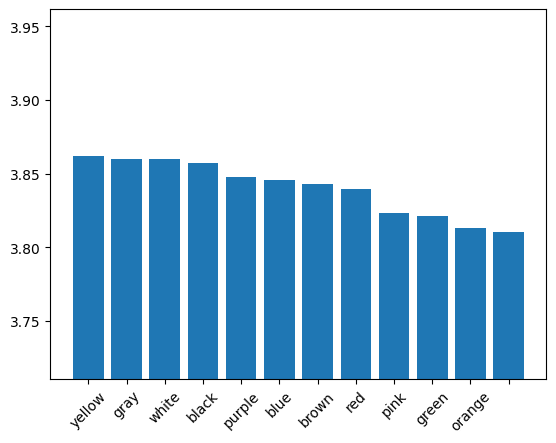

In [8]:
# Plot the bar chart
plt.bar(srednie_oceny.index, srednie_oceny.values)
#plt.xlabel('Weekday')
#plt.ylabel('Number of Orders')
#plt.title('Orders per Weekday')
plt.xticks(rotation=45)  # Tilt the x-axis labels by 45 degrees
plt.ylim([min(srednie_oceny.values)-0.1, max(srednie_oceny.values)+0.1]) # Ustawienie dolnej granicy osi y na 3.0
plt.show()